# Interventions

## A. Several interventions

Vector-borne model with susceptible and infected hosts and vectors in a single population scenario, showing the effect of  various interventions done at different time points.

For more information on how each intervention function works, check out the documentation for each function fed into `newIntervention()`.

In [1]:
from opqua.model import Model

### Model initialization and setup

### Create a new `Model` object

In [2]:
model = Model() # Make a new model object.

#### Define a Setup for our system

Create a new set of parameters called `my_setup` to be used to simulate a population in the model. Use the default parameter set for a _vector-borne_ model.

In [3]:
model.newSetup(     # Create a new Setup.
    'my_setup',
        # Name of the setup.
    preset='vector-borne'
        # Use default 'vector-borne' parameters.
    )

We make a second setup called `my_setup_2` with the same parameters, but duplicate the contact rate.

In [4]:
model.newSetup(    # Create a new Setup.
    'my_setup_2', 
        # Name of the setup.
    preset='vector-borne',
        # Use default 'vector-borne' parameters.
    contact_rate_host_vector=4e-1, 
        # rate of host-vector contact events, not necessarily transmission, assumes 
        # constant population density.
    )

#### Create a population in our model

Create a new population of 100 hosts and 100 vectors called `my_population`. The population uses parameters stored in `my_setup`.

In [5]:
model.newPopulation(        # Create a new Population.
    'my_population',
        # Unique identifier for this population in the model.
    'my_setup',
        # Predefined Setup object with parameters for this population.
     num_hosts=100,
        # Number of hosts in the population with.
     num_vectors=100
        # Number of vectors in the population with.
    )

#### Manipulate hosts and vectors in the population

`my_population` starts with _AAAAAAAAAA_ genotype pathogens.

In [6]:
model.addPathogensToHosts(  # Add specified pathogens to random hosts.
    'my_population',
        # ID of population to be modified.
    {'AAAAAAAAAA':20} 
        # Dictionary containing pathogen genomes to add as keys and 
        # number of hosts each one will be added to as values.
    )

#### Define the interventions

1. At time 20, adds pathogens of genomes _TTTTTTTTTT_ and _CCCCCCCCCC_ to 5 random hosts each.

In [7]:
model.newIntervention(  # Create a new Intervention.
    20, 
        # time at which intervention will take place.
    'addPathogensToHosts',
        # intervention to be carried out, must correspond to the name of a method of 
        # the Model object.
    [ 'my_population', {'TTTTTTTTTT':5, 'CCCCCCCCCC':5, } ]
        # arguments to be passed to the intervention method.
    )

2. At time 50, adds 10 healthy vectors to population.

In [8]:
model.newIntervention(  # Create a new Intervention.
    50, 
        # time at which intervention will take place.
    'addVectors', 
        # intervention to be carried out, must correspond to the name of a method of 
        # the Model object.
    [ 'my_population', 10 ] 
        # arguments to be passed to the intervention method.
    )

3. At time 50, selects 10 healthy vectors from population `my_population` and stores them under the group ID `10_new_vectors`.

In [9]:
model.newIntervention(  # Create a new Intervention.
    50, 
        # time at which intervention will take place.
    'newVectorGroup',
        # intervention to be carried out, must correspond to the name of a method of 
        # the Model object.
    [ 'my_population', '10_new_vectors', 10, 'healthy' ]
        # arguments to be passed to the intervention method.
    )

4. At time 50, adds pathogens of genomes _GGGGGGGGGG_ to 10 random hosts in the `10_new_vectors` group (so, all 10 of them). The last `10_new_vectors` argument specifies which group to sample from (if not specified, sampling occurs from whole population).

In [10]:
model.newIntervention(  # Create a new Intervention.
    50, 
        # time at which intervention will take place.
    'addPathogensToVectors',
        # intervention to be carried out, must correspond to the name of a method of 
        # the Model object.
    [ 'my_population', {'GGGGGGGGGG':10}, '10_new_vectors' ]
        # arguments to be passed to the intervention method.
    )

5. At time 100, changes the parameters of my_population to those in `my_setup_2`, with twice the contact rate.

In [11]:
model.newIntervention(  # Create a new Intervention.
    100, 
        # time at which intervention will take place.
    'setSetup', 
        # intervention to be carried out, must correspond to the name of a method of 
        # the Model object.
    [ 'my_population', 'my_setup_2' ] 
        # arguments to be passed to the intervention method.
    )

6. At time 150, selects 100% of infected hosts and stores them under the group ID `treated_hosts`. The third argument selects all hosts available when set to -1, as above.

In [12]:
model.newIntervention(  # Create a new Intervention.
    150, 
        # time at which intervention will take place.
    'newHostGroup',
        # intervention to be carried out, must correspond to the name of a method of 
        # the Model object.
    [ 'my_population', 'treated_hosts', -1, 'infected' ]
        # arguments to be passed to the intervention method.
    )

7. At time 150, selects 100% of infected vectors and stores them under the group ID `treated_vectors`. The third argument selects all vectors available when set to -1, as above.

In [13]:
model.newIntervention(  # Create a new Intervention.
    150, 
        # time at which intervention will take place.
    'newVectorGroup',
        # intervention to be carried out, must correspond to the name of a method of 
        # the Model object.
    [ 'my_population', 'treated_vectors', -1, 'infected' ]
        # arguments to be passed to the intervention method.
    )

8. At time 150, treat 100% of the `treated_hosts` population with a treatment that kills pathogens unless they contain a _GGGGGGGGGG_ sequence in their genome.

In [14]:
model.newIntervention(  # Create a new Intervention.
    150, 
        # time at which intervention will take place.
    'treatHosts',
        # intervention to be carried out, must correspond to the name of a method of 
        # the Model object.
    [ 'my_population', 1, 'GGGGGGGGGG', 'treated_hosts' ]
        # arguments to be passed to the intervention method.
    )

9. At time 150, treat 100% of the `treated_vectors` population with a treatment that kills pathogens unless they contain a _GGGGGGGGGG_ sequence in their genome.

In [15]:
model.newIntervention(  # Create a new Intervention.
    150, 
        # time at which intervention will take place.
    'treatVectors',
        # intervention to be carried out, must correspond to the name of a method of 
        # the Model object.
    [ 'my_population', 1, 'GGGGGGGGGG', 'treated_vectors' ]
        # arguments to be passed to the intervention method.
    )

10. At time 250, selects 85% of random hosts and stores them under the group ID `vaccinated`. They may be healthy or infected.

In [16]:
model.newIntervention(  # Create a new Intervention.
    250, 
        # time at which intervention will take place.
    'newHostGroup',
        # intervention to be carried out, must correspond to the name of a method of 
        # the Model object.
    [ 'my_population', 'vaccinated', 0.85, 'any' ]
        # arguments to be passed to the intervention method.
    )

11. At time 250, protects 100% of the vaccinated group from pathogens with a _GGGGGGGGGG_ sequence in their genome.

In [17]:
model.newIntervention(  # Create a new Intervention.
    250, 
        # time at which intervention will take place.
    'protectHosts',
        # intervention to be carried out, must correspond to the name of a method of 
        # the Model object.
    [ 'my_population', 1, 'GGGGGGGGGG', 'vaccinated' ]
        # arguments to be passed to the intervention method.
    )

### Model simulation

In [18]:
model.run(  # Simulate model for a specified time between two time points.
    0,      # Initial time point.
    400     # Final time point.
    )

Simulating time: 47.82778878187784, event: RECOVER_VECTOR
Simulating time: 78.3366736929209, event: RECOVER_VECTOR
Simulating time: 105.91879303271841, event: CONTACT_HOST_VECTOR
Simulating time: 118.47279407649962, event: RECOVER_HOST
Simulating time: 131.35992383183006, event: CONTACT_VECTOR_HOST
Simulating time: 142.51592961651278, event: CONTACT_HOST_VECTOR
Simulating time: 155.0493103157924, event: CONTACT_HOST_VECTOR
Simulating time: 166.15922138729405, event: CONTACT_VECTOR_HOST
Simulating time: 178.45033758585132, event: CONTACT_HOST_VECTOR
Simulating time: 191.46530199493813, event: CONTACT_HOST_VECTOR
Simulating time: 202.95353967543554, event: CONTACT_VECTOR_HOST
Simulating time: 215.14396460201561, event: RECOVER_VECTOR
Simulating time: 227.37567502659184, event: CONTACT_VECTOR_HOST
Simulating time: 239.10997595769174, event: CONTACT_VECTOR_HOST
Simulating time: 251.43868107426454, event: RECOVER_VECTOR
Simulating time: 270.88105008645147, event: CONTACT_HOST_VECTOR
Simulat

### Output data manipulation and visualization

#### Create a table with the results of the given model history

In [19]:
data = model.saveToDataFrame(
        # Creates a pandas Dataframe in long format with the given model history, 
        # with one host or vector per simulation time in each row.
    'intervention_examples.csv'
        # Name of the file to save the data to.
    )
data

Saving file...


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.


[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Batch computation too fast (0.18432052612304692s.) Setting batch_size=2.
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Batch computation too fast (0.016484975814819336s.) Setting batch_size=4.
[Parallel(n_jobs=8)]: Done  26 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done  44 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Batch computation too fast (0.030623912811279297s.) Setting batch_size=8.
[Parallel(n_jobs=8)]: Done  76 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 120 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Batch computation too fast (0.043166160583496094s.) Setting batch_size=16.
[Parallel(n_jobs=8)]: Done 224 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Batch computation too fast (0.04822254180908203s.) Setting batch_size=32.
[Parallel(n_jobs=8)]: Done 408 t

...file saved.


/home/acs98/miniconda3/envs/opqua/lib/python3.9/site-packages/opqua/model.py:1008: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  data = saveToDf(


,Time,Population,Organism,ID,Pathogens,Protection,Alive
0,0.0,my_population,Host,my_population_0,AAAAAAAAAA,NaN,True
1,0.0,my_population,Host,my_population_1,NaN,NaN,True
2,0.0,my_population,Host,my_population_2,NaN,NaN,True
3,0.0,my_population,Host,my_population_3,NaN,NaN,True
4,0.0,my_population,Host,my_population_4,NaN,NaN,True
...,...,...,...,...,...,...,...
1898145,400.0,my_population,Vector,my_population_105,GGGGGGGGGG,NaN,True
1898146,400.0,my_population,Vector,my_population_106,NaN,NaN,True
1898147,400.0,my_population,Vector,my_population_107,NaN,NaN,True
1898148,400.0,my_population,Vector,my_population_108,NaN,NaN,True


#### Create a plot to track pathogen genotypes across time

1 / 4 genotypes processed.
2 / 4 genotypes processed.
3 / 4 genotypes processed.
4 / 4 genotypes processed.


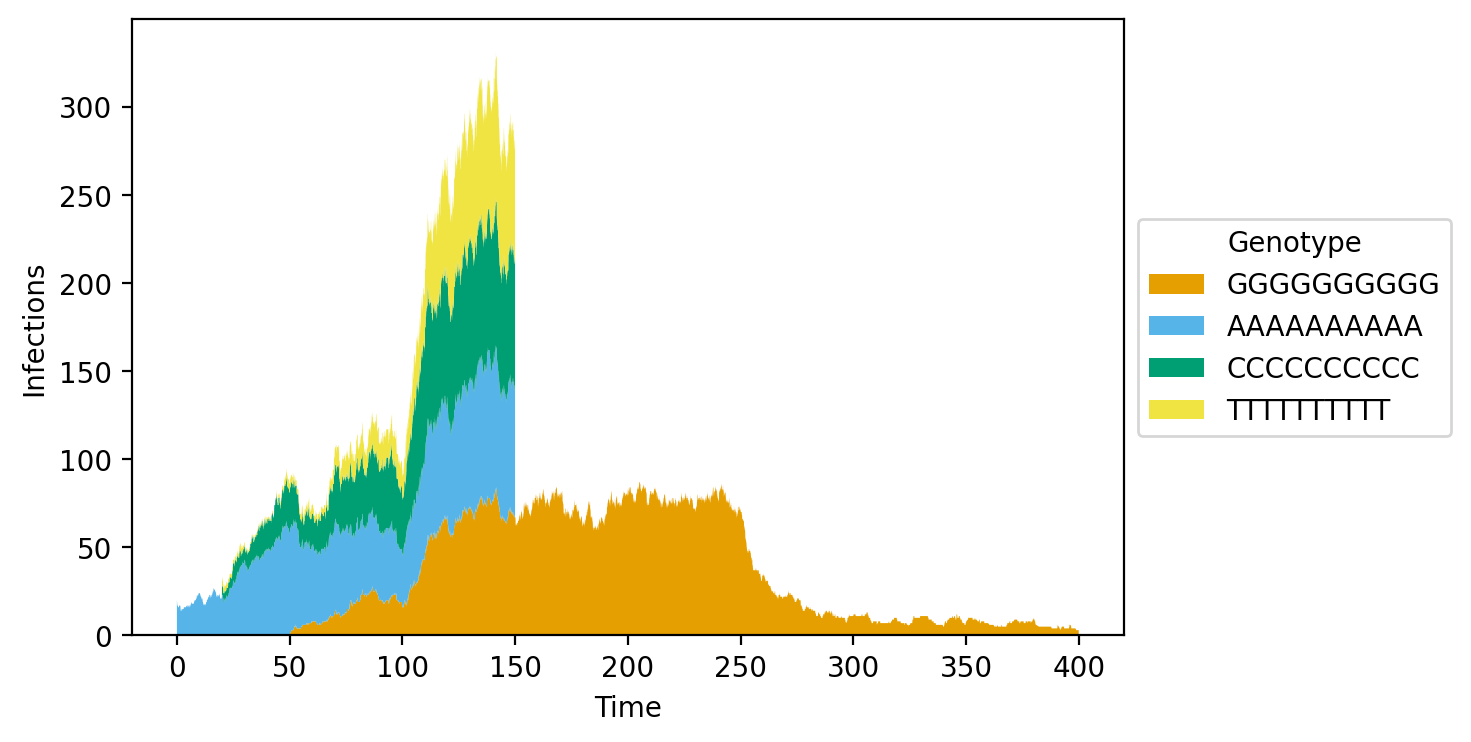

In [20]:
plot_composition = model.compositionPlot( 
        # Create a plot to track pathogen genotypes across time.
    'intervention_examples_composition.png',
        # Name of the file to save the plot to.
    data 
        # Dataframe with model history.
    )

#### Create a compartment plot

Plot the number of susceptible and infected hosts in the model over time.

Notice the total number of infections in the composition plot can exceed the number of infected hosts in the compartment plot. This happens because a single host infected by multiple genotypes is counted twice in the former, but not the latter.

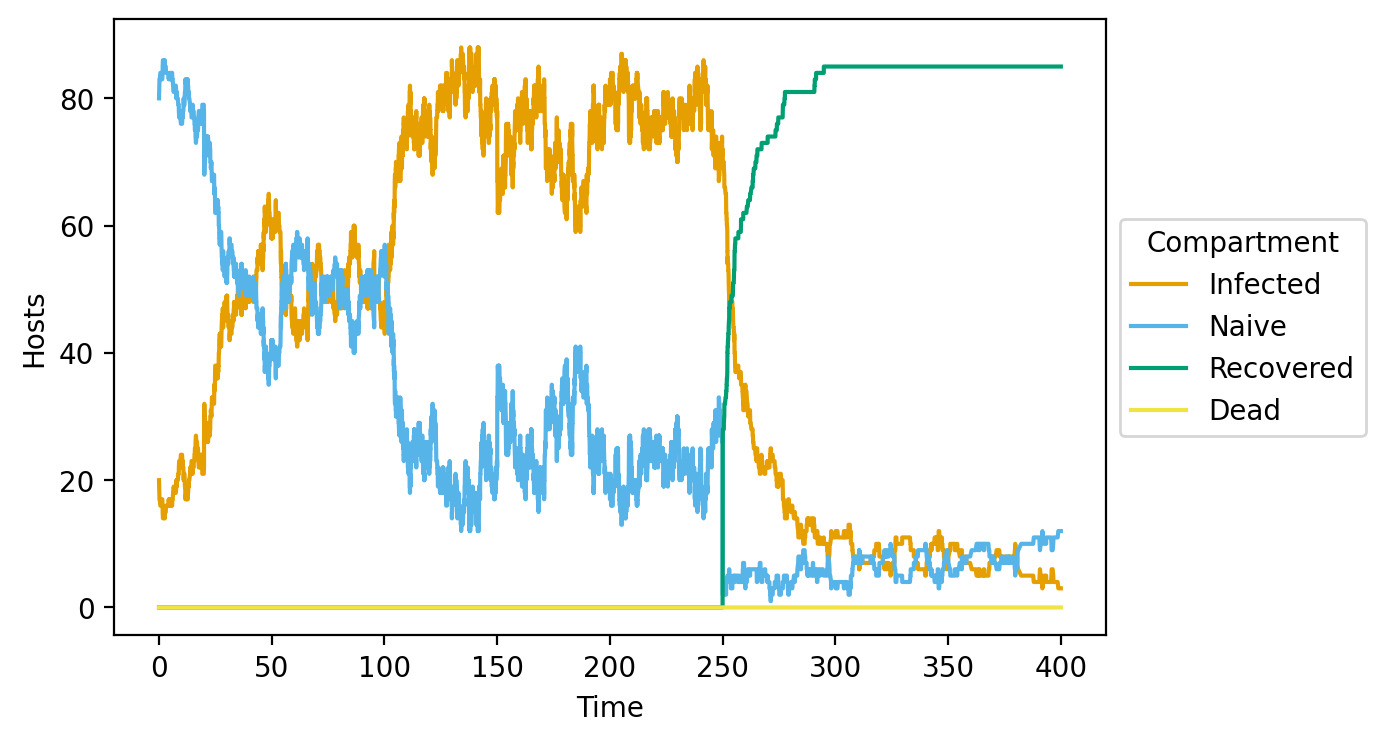

In [21]:
plot_compartments = model.compartmentPlot(
        # Create plot with number of naive, infected, recovered, dead hosts/vectors vs. time.
    'intervention_examples_compartments.png', 
        # File path, name, and extension to save plot under.
    data
        # Dataframe with model history.
    )